In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

## Step 1: Data Exploration

### 1: Read and explore the dataset

In [5]:
df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')

# Strip trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns


/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_51837/1488339330.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')


Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [6]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,,2,3,1,0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30,1,1,1,,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,,1,1,0,,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24,1,1,1,,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34,1,1,0,,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30,1,1,0,,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [8]:
print(df.dtypes) 

customer_id                  object
customer_region              object
customer_age                 object
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                  object
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31888 non-null  object 
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31888 non-null  object 
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

found some missmatches here which dosent make sense in the datatype format

In [10]:
print(df.columns)

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')


In [11]:
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')
df['first_order'] = pd.to_numeric(df['first_order'], errors='coerce')
df['HR_0'] = pd.to_numeric(df['HR_0'], errors='coerce').fillna(0).astype(int)



In [12]:
print(df.dtypes) 


customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [13]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


customer_id                   0
customer_region               0
customer_age                727
vendor_count                  0
product_count                 0
is_chain                      0
first_order                 106
last_order                    0
last_promo                    0
payment_method                0
CUI_American                  0
CUI_Asian                     0
CUI_Beverages                 0
CUI_Cafe                      0
CUI_Chicken Dishes            0
CUI_Chinese                   0
CUI_Desserts                  0
CUI_Healthy                   0
CUI_Indian                    0
CUI_Italian                   0
CUI_Japanese                  0
CUI_Noodle Dishes             0
CUI_OTHER                     0
CUI_Street Food / Snacks      0
CUI_Thai                      0
DOW_0                         0
DOW_1                         0
DOW_2                         0
DOW_3                         0
DOW_4                         0
DOW_5                         0
DOW_6   

In [14]:
# Get data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [15]:
# Summary statistics for numeric columns
numeric_summary = df.describe()
print(numeric_summary)

#to spot outliers


       customer_age  vendor_count  product_count      is_chain   first_order  \
count  31161.000000  31888.000000   31888.000000  31888.000000  31782.000000   
mean      27.506499      3.102609       5.668245      2.818866     28.478604   
std        7.160898      2.771587       6.957287      3.977529     24.109086   
min       15.000000      0.000000       0.000000      0.000000      0.000000   
25%       23.000000      1.000000       2.000000      1.000000      7.000000   
50%       26.000000      2.000000       3.000000      2.000000     22.000000   
75%       31.000000      4.000000       7.000000      3.000000     45.000000   
max       80.000000     41.000000     269.000000     83.000000     90.000000   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     2

2. 
vendor_count and product_count
Minimum values are 0: It’s unusual for a customer to have zero vendors or zero products if they’ve placed an order. Check if these zero values represent missing data or if they indicate customers who signed up but never ordered.

Maximum vendor_count is 41 and product_count is 269: These values are significantly higher than the median (2 for vendor_count and 3 for product_count), suggesting the presence of outliers. Consider checking these high values to see if they are legitimate or data errors.

Maximum value is 83: If is_chain is a binary indicator (0 or 1), values above 1 indicate data entry errors. If it is categorical, such as indicating the number of chain restaurants visited, it should be renamed to avoid confusion.

 Hourly Order Counts (HR_0 to HR_23)
Mean values are very low: Suggesting that orders are sparse across most hours.
Maximum values are much higher than the mean: Some hours have up to 36 orders (HR_20), indicating significant variability. Consider plotting the hourly distributions to visualize when orders peak.

The presence of many zeros in the data: For many columns (e.g., hourly order counts and cuisine spending), the 75th percentile is still 0, indicating that a large proportion of entries are zeros.
Wide ranges in values: This suggests potential outliers, which could impact your analysis.


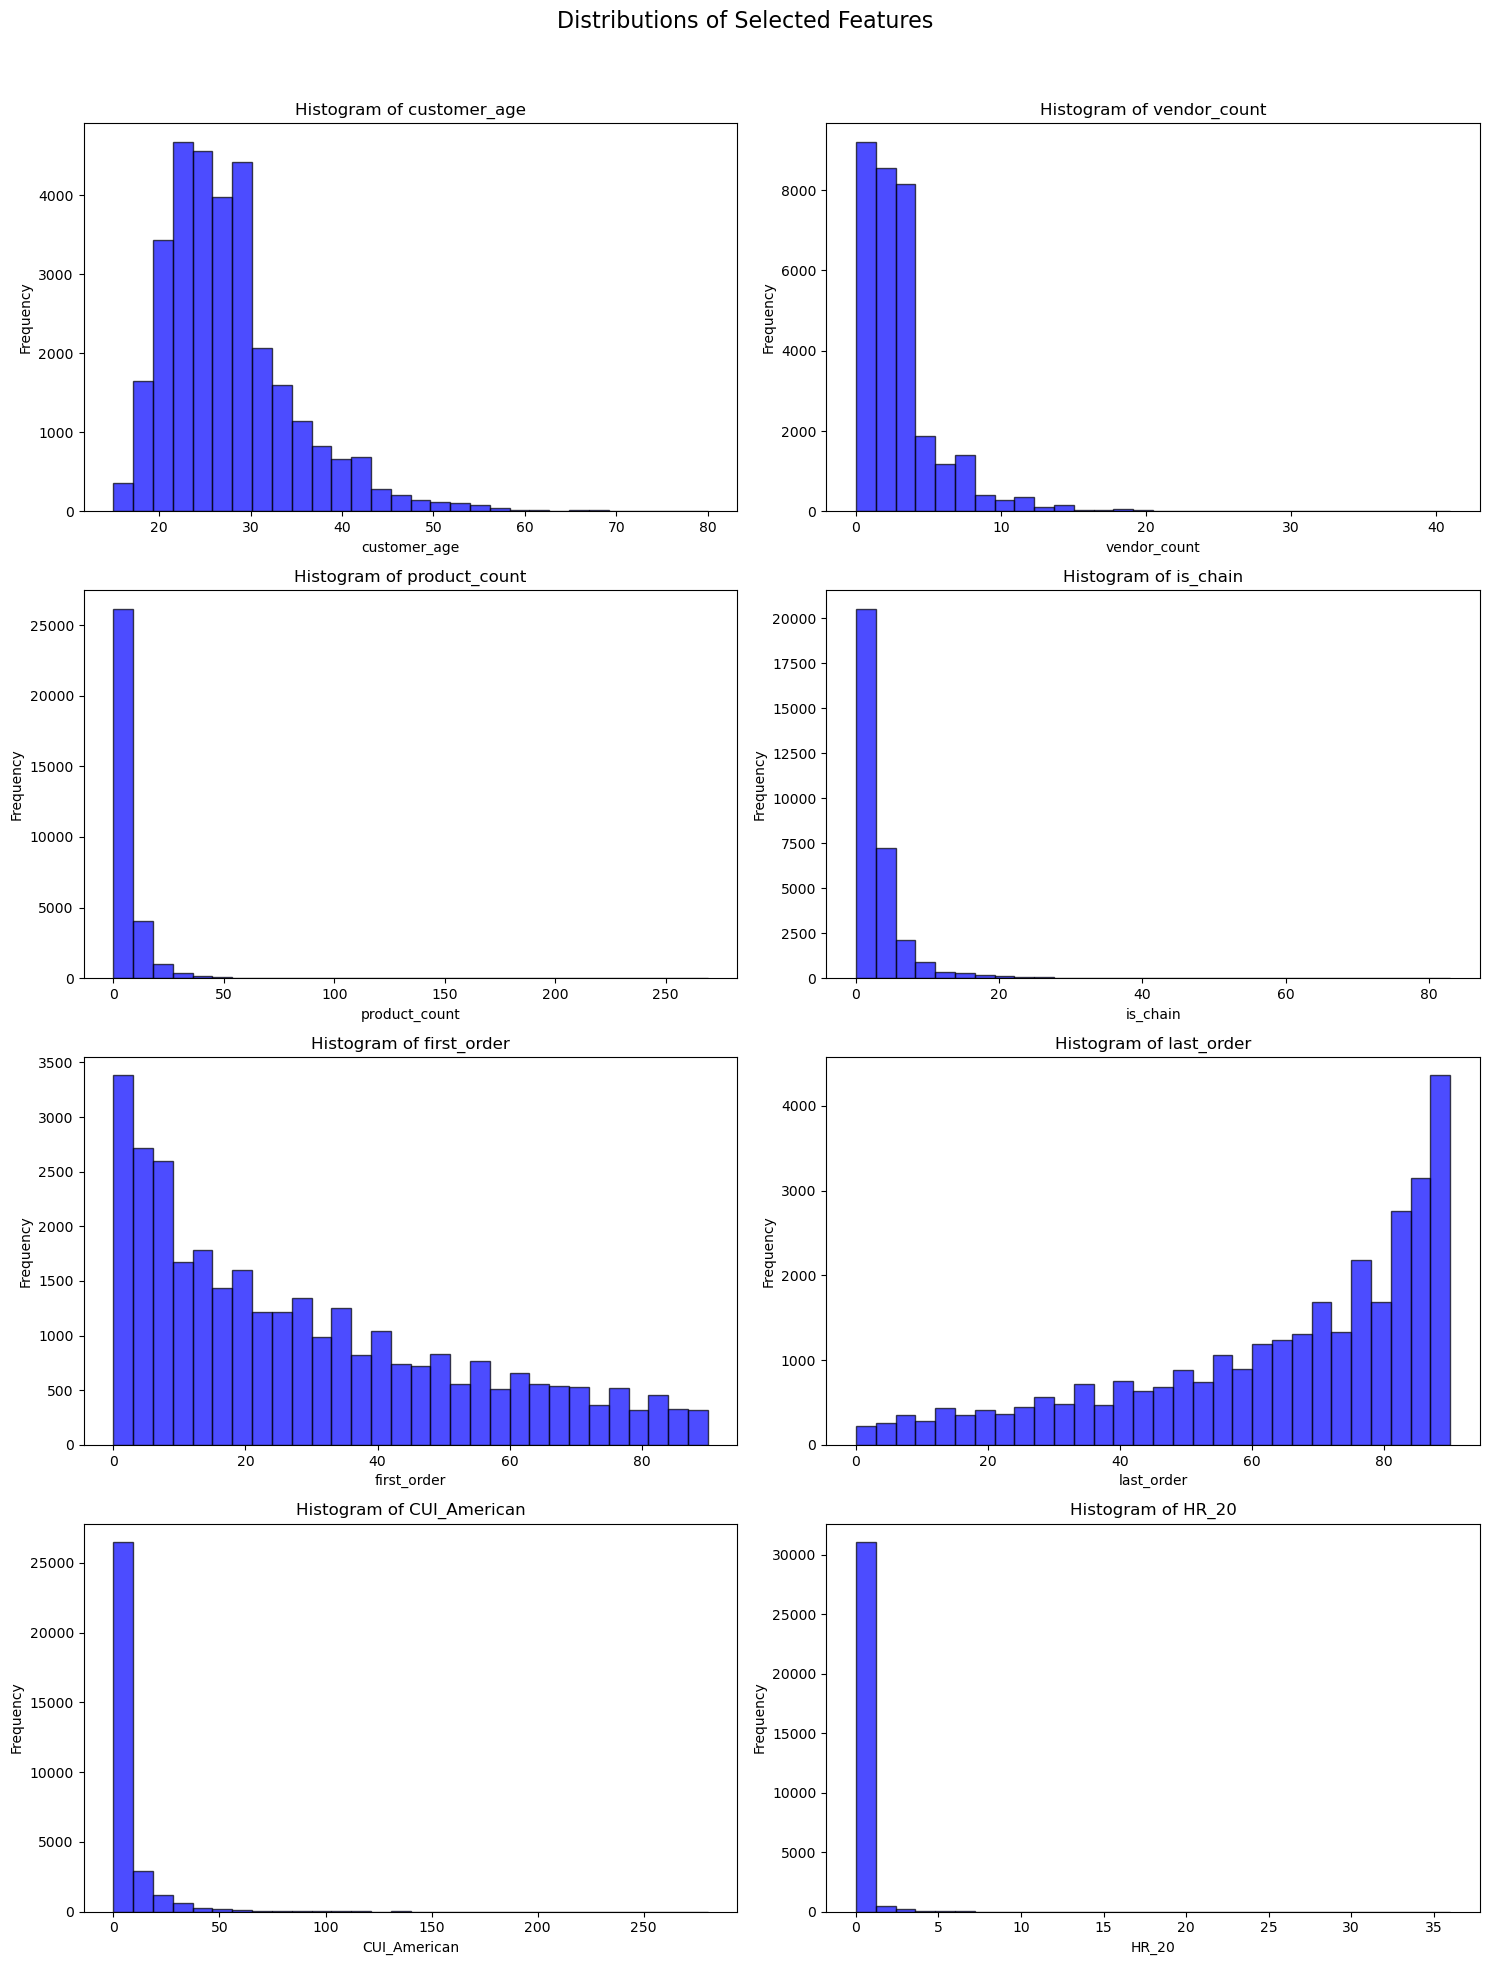

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe df is already loaded with the appropriate data

# Plotting histograms and boxplots for initial columns to check distributions
columns_to_plot = [
    'customer_age', 'vendor_count', 'product_count', 
    'is_chain', 'first_order', 'last_order', 'CUI_American', 'HR_20'
]

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distributions of Selected Features', fontsize=16)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Generate histograms and boxplots for each column
for i, col in enumerate(columns_to_plot):
    # Histogram
    axs[i].hist(df[col].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

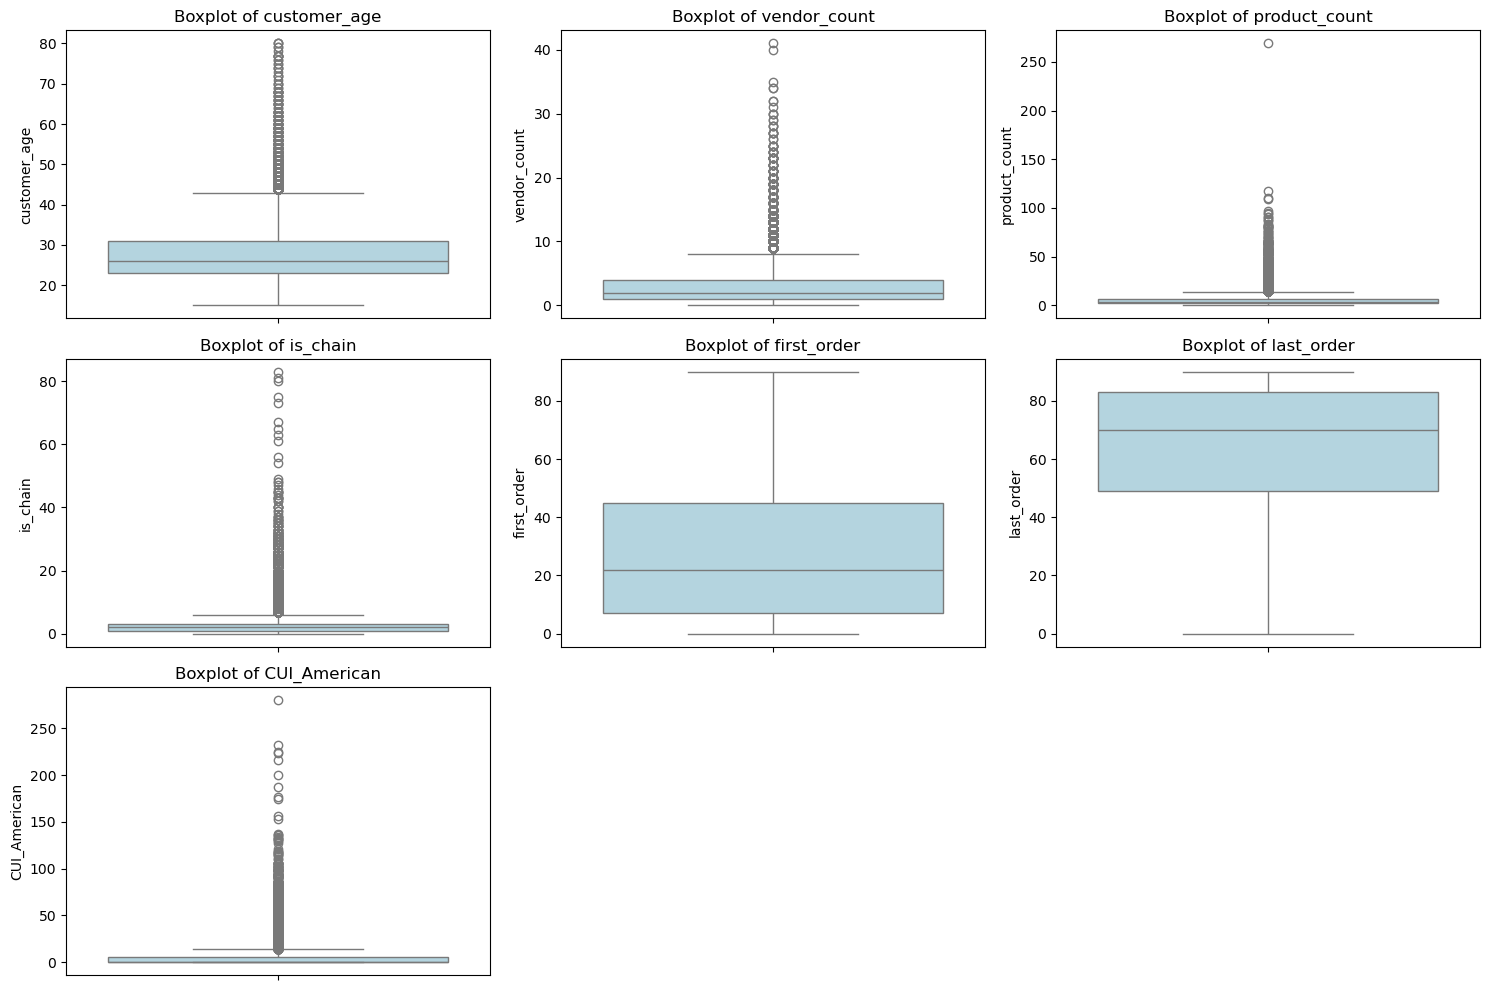

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [
    'customer_age', 'vendor_count', 'product_count', 
    'is_chain', 'first_order', 'last_order', 'CUI_American'
]

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plotting boxplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


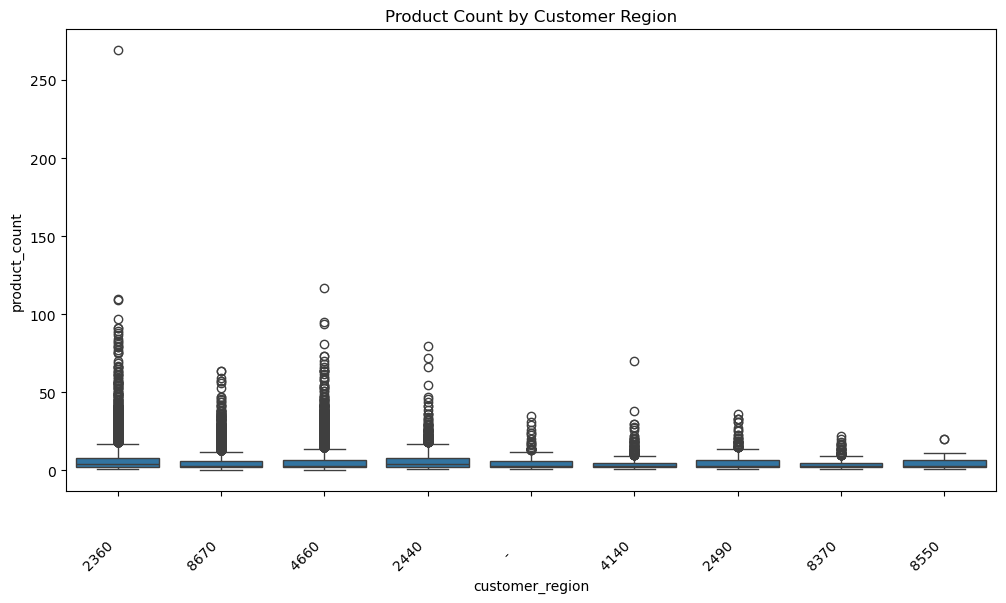

In [18]:
# Boxplot of product_count by customer_region
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_region', y='product_count', data=df)
plt.xticks(rotation=45)
plt.title('Product Count by Customer Region')
plt.show()


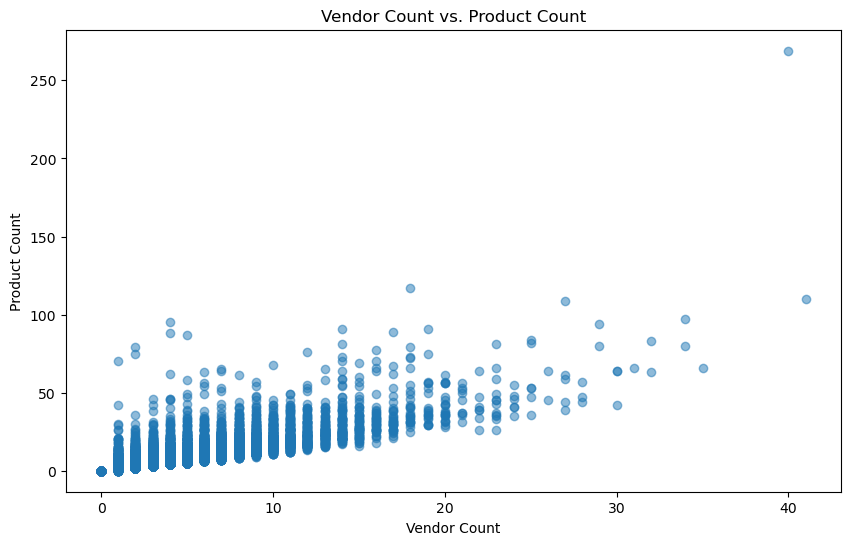

In [19]:
# Scatter plot of vendor_count vs. product_count
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['product_count'], alpha=0.5)
plt.xlabel('Vendor Count')
plt.ylabel('Product Count')
plt.title('Vendor Count vs. Product Count')
plt.show()


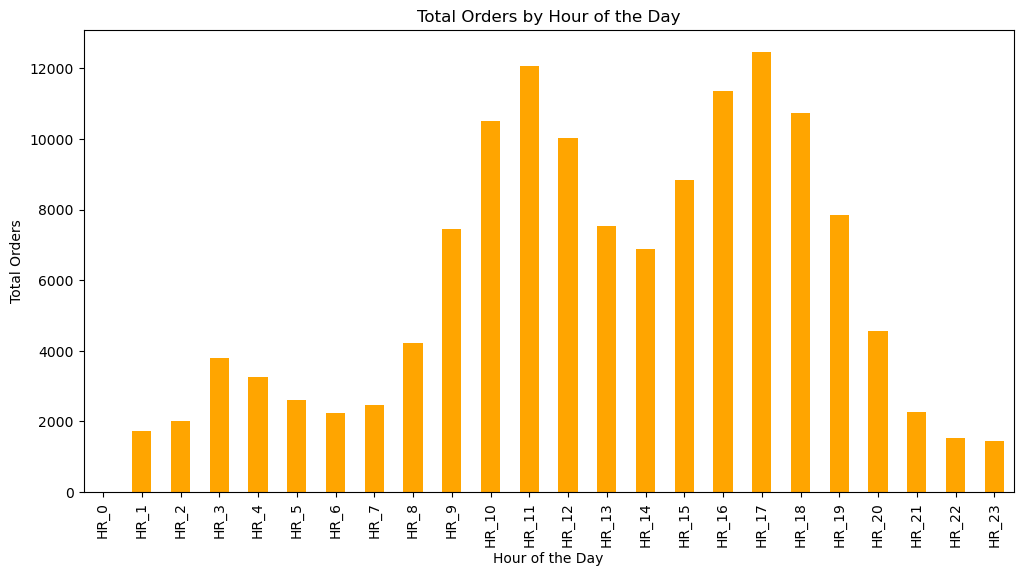

In [20]:
# Summing up orders for each hour column
hour_columns = [f'HR_{i}' for i in range(24)]
hourly_order_counts = df[hour_columns].sum()

# Plotting hourly order counts
plt.figure(figsize=(12, 6))
hourly_order_counts.plot(kind='bar', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.title('Total Orders by Hour of the Day')
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [22]:
# df.corr()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

df_numeric = df.drop(columns=['customer_id', 'customer_region', 'last_promo', 'payment_method'])
corr_matrix = df_numeric.corr()

corr_matrix



Index(['customer_id', 'customer_region', 'last_promo', 'payment_method'], dtype='object')


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_age,1.000000,0.000952,0.005372,0.001783,0.004643,0.012715,0.008004,0.013415,-0.003188,0.006515,...,0.006084,0.005325,0.004002,0.004836,0.008197,-0.003590,-0.003193,0.006217,-0.004439,0.000967
vendor_count,0.000952,1.000000,0.827636,0.762916,-0.386735,0.377479,0.272846,0.307482,0.215641,0.185358,...,0.333791,0.288602,0.309798,0.368721,0.398170,0.389441,0.310358,0.233004,0.192796,0.190071
product_count,0.005372,0.827636,1.000000,0.827071,-0.358568,0.350343,0.335848,0.337223,0.230520,0.273756,...,0.406931,0.393186,0.416981,0.463289,0.449943,0.418980,0.336397,0.235623,0.192515,0.186168
is_chain,0.001783,0.762916,0.827071,1.000000,-0.331144,0.298150,0.266221,0.109205,0.241524,0.237863,...,0.352830,0.308112,0.323691,0.418688,0.456111,0.451465,0.360529,0.253091,0.165580,0.154136
first_order,0.004643,-0.386735,-0.358568,-0.331144,1.000000,0.219895,-0.159178,-0.116353,-0.081930,-0.066465,...,-0.150666,-0.147372,-0.175380,-0.192134,-0.186134,-0.160559,-0.128709,-0.099894,-0.072124,-0.068770
last_order,0.012715,0.377479,0.350343,0.298150,0.219895,1.000000,0.150594,0.151368,0.076547,0.076308,...,0.154960,0.181077,0.181467,0.175733,0.152952,0.125928,0.097895,0.082626,0.070758,0.062984
CUI_American,0.008004,0.272846,0.335848,0.266221,-0.159178,0.150594,1.000000,0.095519,0.006829,0.089817,...,0.147189,0.197519,0.212734,0.181558,0.113253,0.059548,0.041387,0.025869,0.043275,0.051568
CUI_Asian,0.013415,0.307482,0.337223,0.109205,-0.116353,0.151368,0.095519,1.000000,0.093345,0.006014,...,0.058803,0.034119,0.025913,-0.009550,-0.039530,-0.054670,-0.045823,-0.037894,0.076690,0.140164
CUI_Beverages,-0.003188,0.215641,0.230520,0.241524,-0.081930,0.076547,0.006829,0.093345,1.000000,-0.021522,...,0.064185,0.007359,-0.025948,-0.006919,0.019311,0.042498,0.037647,0.027853,0.029024,0.038797
CUI_Cafe,0.006515,0.185358,0.273756,0.237863,-0.066465,0.076308,0.089817,0.006014,-0.021522,1.000000,...,0.115859,0.143299,0.154576,0.124378,0.074091,0.050702,0.025207,0.015363,0.007424,-0.001376


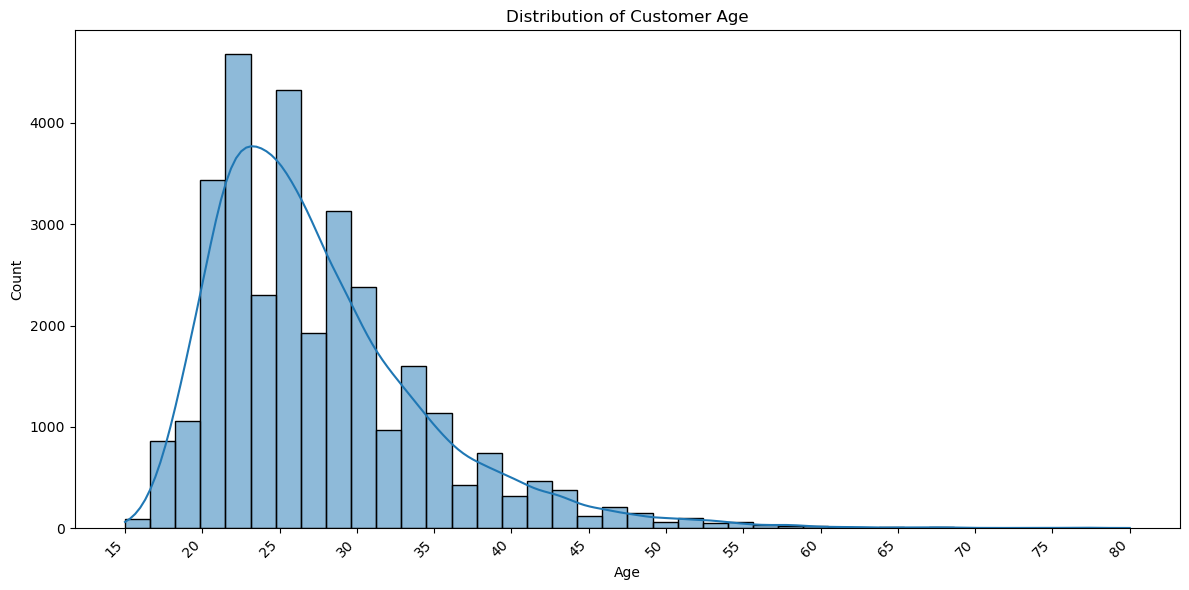

Minimum age: 15
Maximum age: 80
Mean age: 27.51
Median age: 26.0
Number of valid age entries: 31161
Number of missing or invalid age entries: 727


In [23]:
# Convert 'customer_age' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

# Remove NaN values and sort
age_data = df['customer_age'].dropna().sort_values()

# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(age_data, bins=40, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Improve x-axis readability
min_age = int(age_data.min())
max_age = int(age_data.max())
plt.xticks(range(min_age, max_age+1, 5))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Mean age: {age_data.mean():.2f}")
print(f"Median age: {age_data.median()}")
print(f"Number of valid age entries: {len(age_data)}")
print(f"Number of missing or invalid age entries: {len(df) - len(age_data)}")

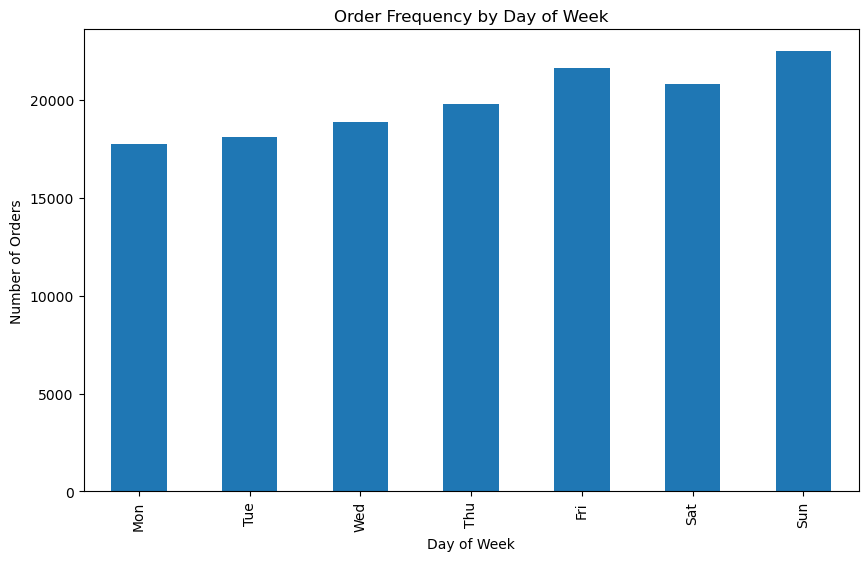

In [24]:
dow_order = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum()
plt.figure(figsize=(10, 6))
dow_order.plot(kind='bar')
plt.title('Order Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

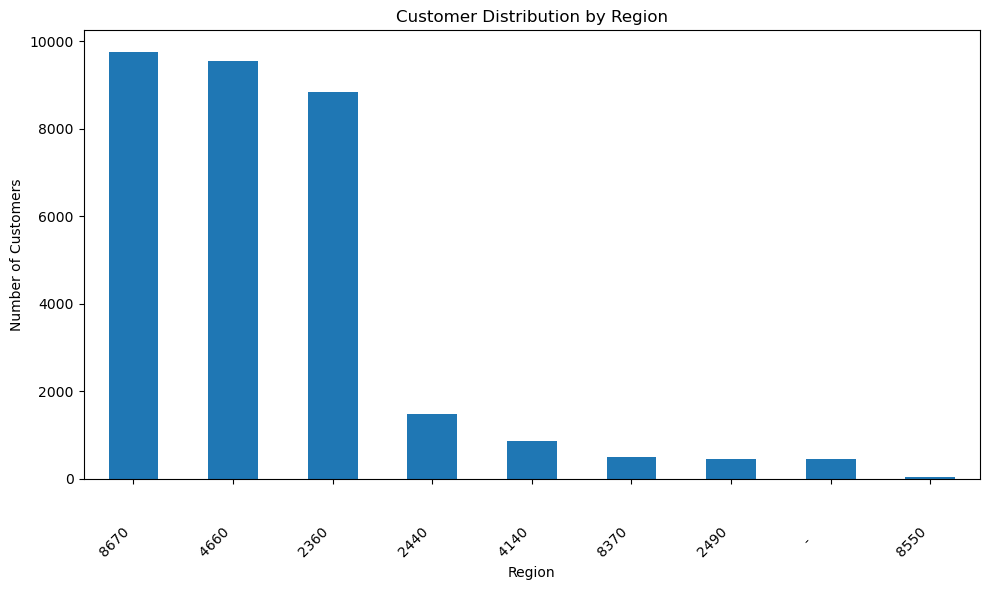

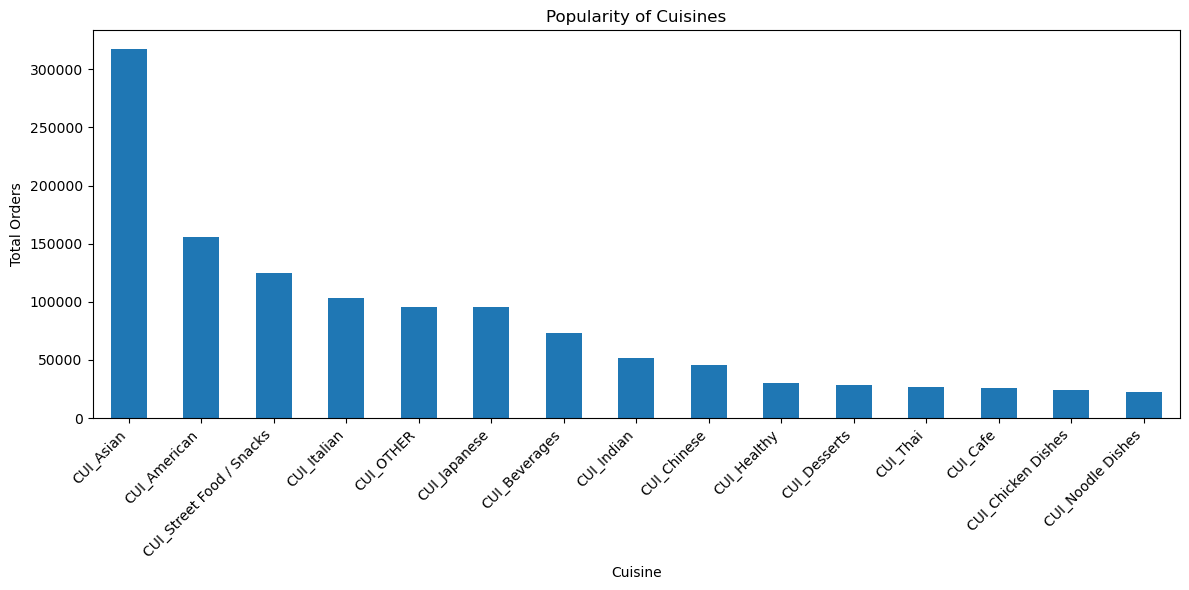

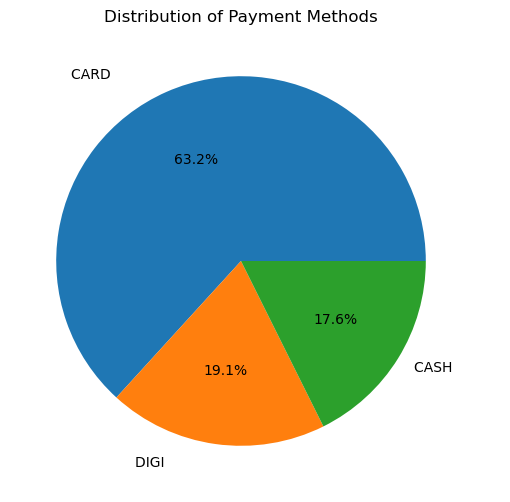

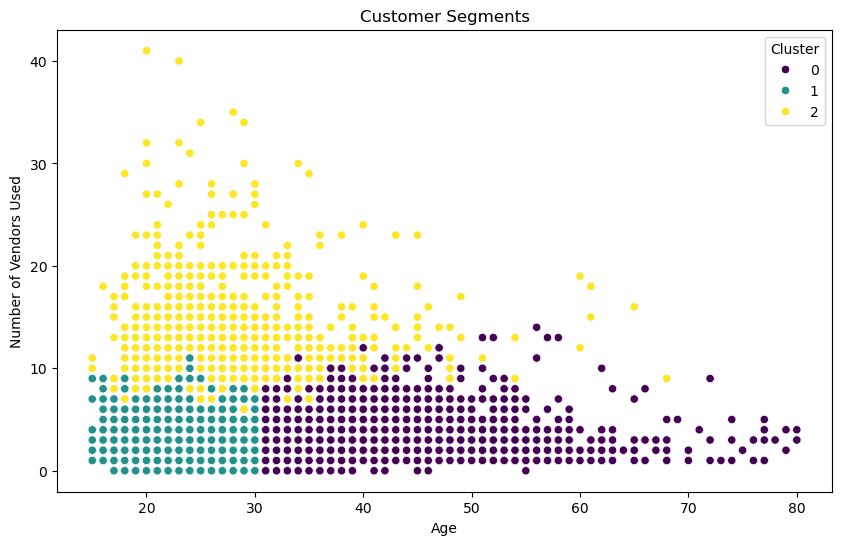

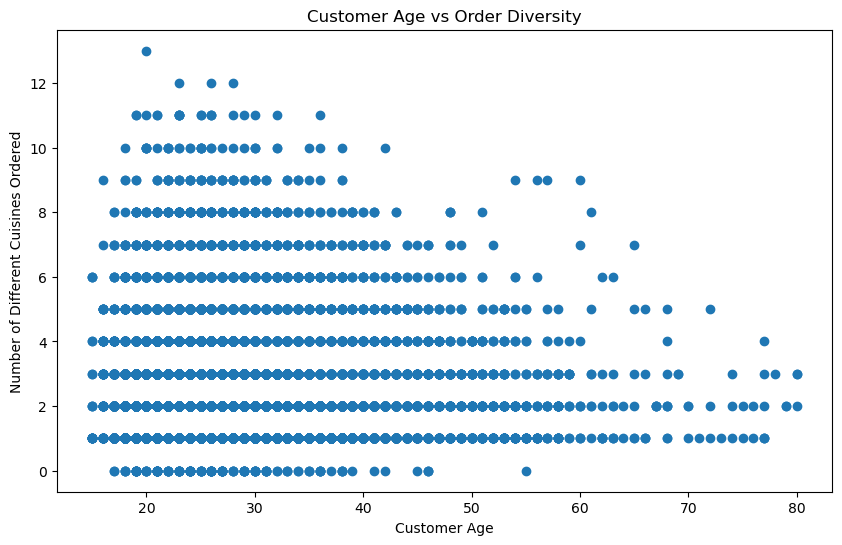

Correlation between age and order diversity: -0.00040440711485676057


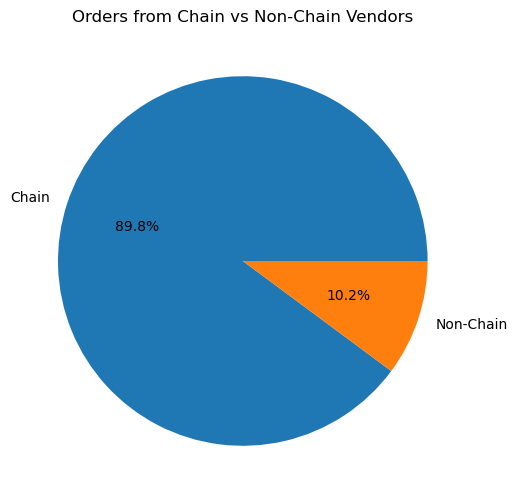

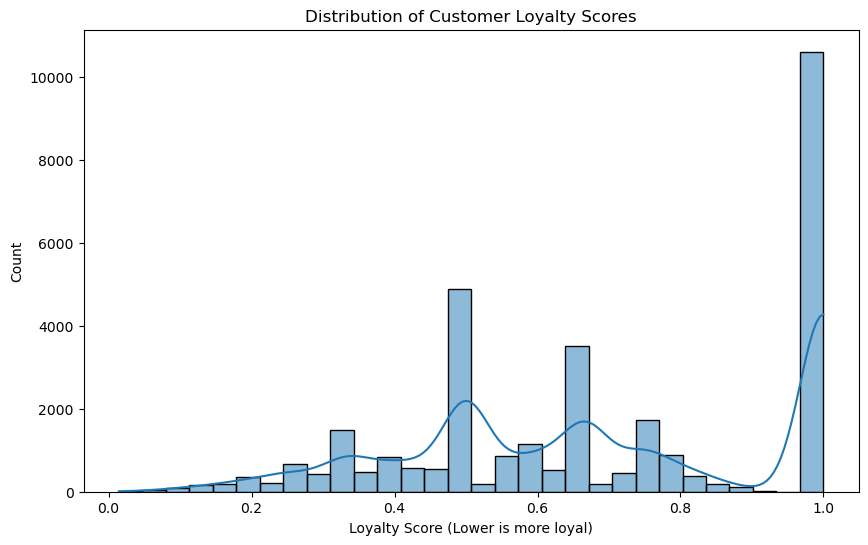

Average loyalty score: inf


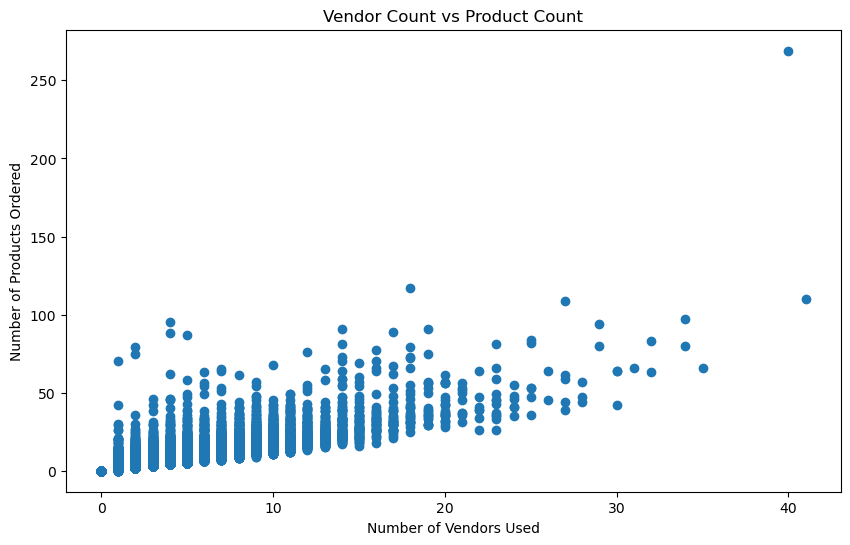

Correlation between vendor count and product count: 0.8276364706442381


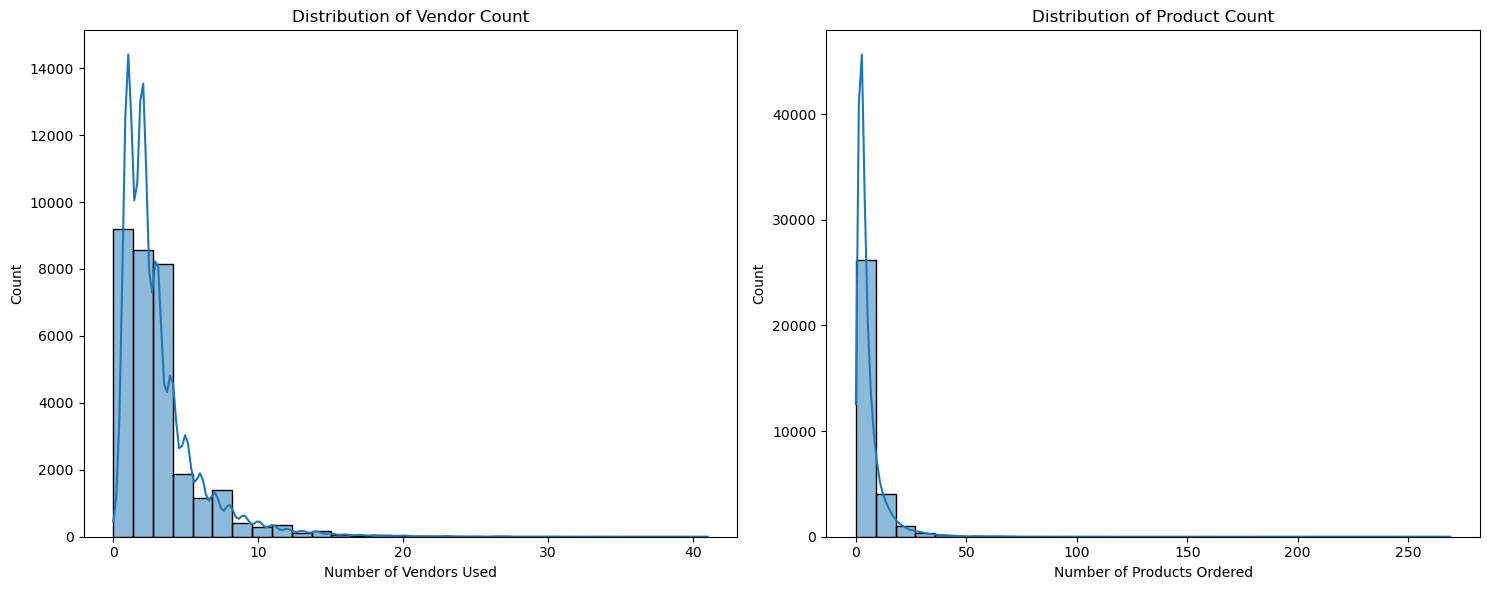

In [25]:

# 1. Data Overview and Preprocessing
print(df.info())
print(df.isnull().sum())

# Convert 'customer_age' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

# 2. Customer Demographics
# Age distribution (we've already done this)

# Region distribution
region_counts = df['customer_region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Cuisine Preferences
cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
cuisine_popularity = df[cuisine_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
cuisine_popularity.plot(kind='bar')
plt.title('Popularity of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Payment and Promotion Analysis
payment_method_counts = df['payment_method'].value_counts()
plt.figure(figsize=(8, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

# 6. Customer Segmentation
# Select features for clustering
features = ['customer_age', 'vendor_count', 'product_count']
X = df[features].dropna()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='customer_age', y='vendor_count', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Number of Vendors Used')
plt.show()

#Relationship between customer age and order diversity:
df['order_diversity'] = df[cuisine_cols].astype(bool).sum(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(df['customer_age'], df['order_diversity'])
plt.title('Customer Age vs Order Diversity')
plt.xlabel('Customer Age')
plt.ylabel('Number of Different Cuisines Ordered')
plt.show()

print("Correlation between age and order diversity:", 
      df['customer_age'].corr(df['order_diversity']))


#chain vs no chain
chain_orders = df[df['is_chain'] > 0]['product_count'].sum()
non_chain_orders = df[df['is_chain'] == 0]['product_count'].sum()

plt.figure(figsize=(8, 6))
plt.pie([chain_orders, non_chain_orders], labels=['Chain', 'Non-Chain'], autopct='%1.1f%%')
plt.title('Orders from Chain vs Non-Chain Vendors')
plt.show()


#costumer loyalty
df['loyalty_score'] = df['vendor_count'] / df['product_count']
plt.figure(figsize=(10, 6))
sns.histplot(df['loyalty_score'], bins=30, kde=True)
plt.title('Distribution of Customer Loyalty Scores')
plt.xlabel('Loyalty Score (Lower is more loyal)')
plt.ylabel('Count')
plt.show()

print("Average loyalty score:", df['loyalty_score'].mean())

#regional cusine preferences
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['product_count'])
plt.title('Vendor Count vs Product Count')
plt.xlabel('Number of Vendors Used')
plt.ylabel('Number of Products Ordered')
plt.show()

print("Correlation between vendor count and product count:", 
      df['vendor_count'].corr(df['product_count']))

# Additional analysis: Distribution of vendor and product counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['vendor_count'], bins=30, kde=True, ax=ax1)
ax1.set_title('Distribution of Vendor Count')
ax1.set_xlabel('Number of Vendors Used')

sns.histplot(df['product_count'], bins=30, kde=True, ax=ax2)
ax2.set_title('Distribution of Product Count')
ax2.set_xlabel('Number of Products Ordered')

plt.tight_layout()
plt.show()


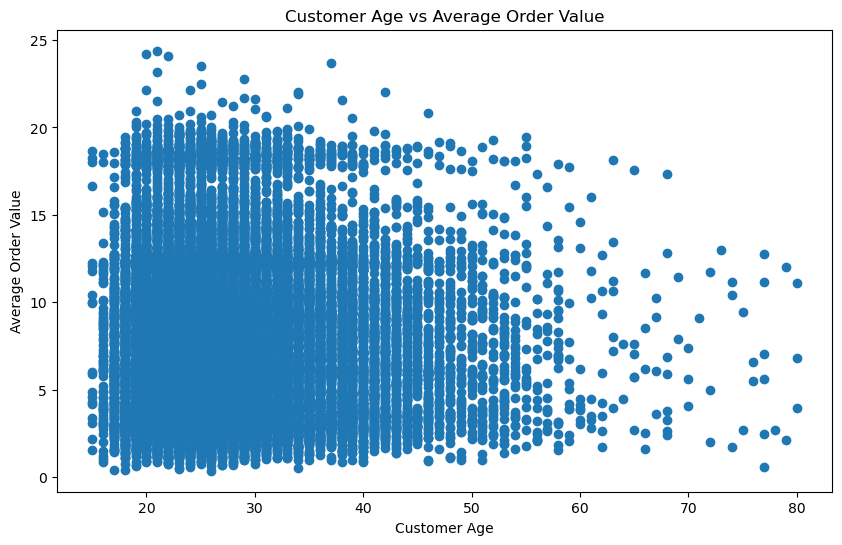

Correlation between age and average order value: nan


/opt/anaconda3/envs/DM2024/lib/python3.12/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [26]:
# Assuming 'total_spend' is the sum of all cuisine columns
df['total_spend'] = df[cuisine_cols].sum(axis=1)
df['avg_order_value'] = df['total_spend'] / df['product_count']

plt.figure(figsize=(10, 6))
plt.scatter(df['customer_age'], df['avg_order_value'])
plt.title('Customer Age vs Average Order Value')
plt.xlabel('Customer Age')
plt.ylabel('Average Order Value')
plt.show()

print("Correlation between age and average order value:", 
      df['customer_age'].corr(df['avg_order_value']))

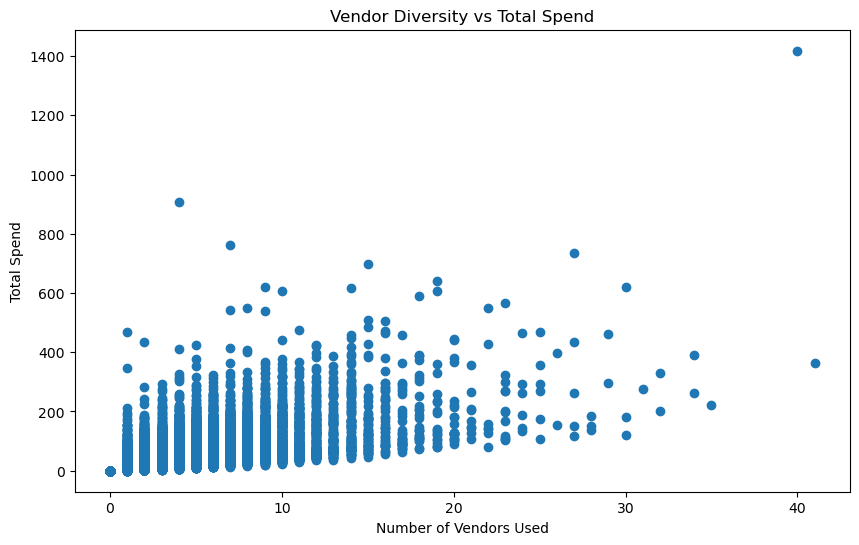

Correlation between vendor count and total spend: 0.6508818224337218


In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['total_spend'])
plt.title('Vendor Diversity vs Total Spend')
plt.xlabel('Number of Vendors Used')
plt.ylabel('Total Spend')
plt.show()

print("Correlation between vendor count and total spend:", 
      df['vendor_count'].corr(df['total_spend']))

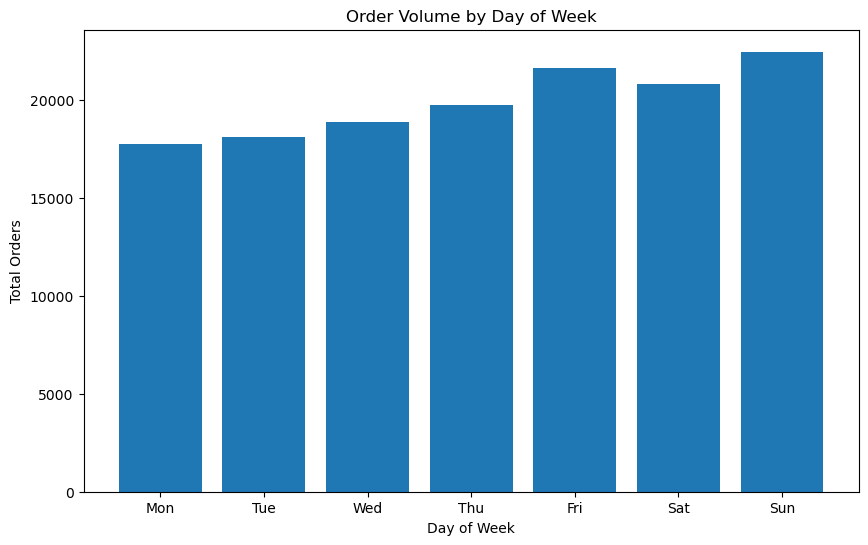

In [28]:
day_cols = [col for col in df.columns if col.startswith('DOW_')]
day_orders = df[day_cols].sum()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
plt.bar(days, day_orders)
plt.title('Order Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Orders')
plt.show()

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_51837/592959414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_by_age = df.groupby('age_group')[cuisine_cols].mean()


<Figure size 1200x600 with 0 Axes>

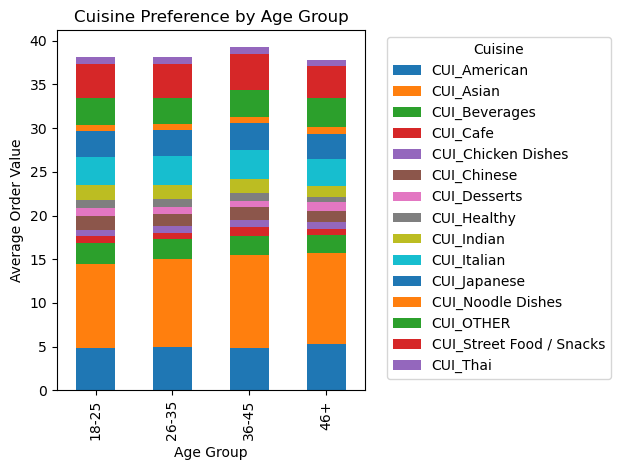

In [29]:
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '46+'])
cuisine_by_age = df.groupby('age_group')[cuisine_cols].mean()

plt.figure(figsize=(12, 6))
cuisine_by_age.plot(kind='bar', stacked=True)
plt.title('Cuisine Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_51837/942376764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_spend = df.groupby('spend_category')['payment_method'].value_counts(normalize=True).unstack()


<Figure size 1200x600 with 0 Axes>

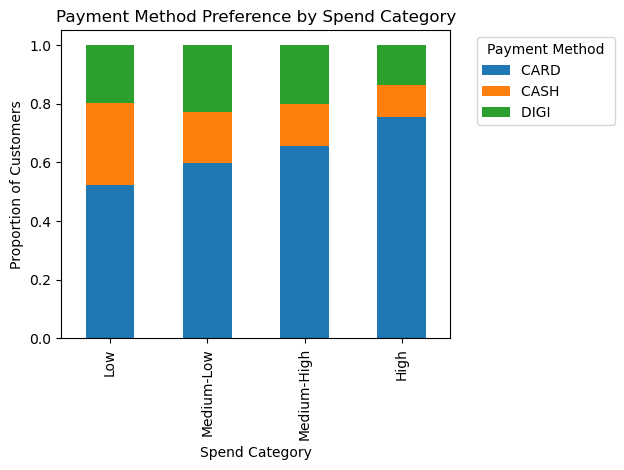

In [30]:
df['spend_category'] = pd.qcut(df['total_spend'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
payment_by_spend = df.groupby('spend_category')['payment_method'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
payment_by_spend.plot(kind='bar', stacked=True)
plt.title('Payment Method Preference by Spend Category')
plt.xlabel('Spend Category')
plt.ylabel('Proportion of Customers')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

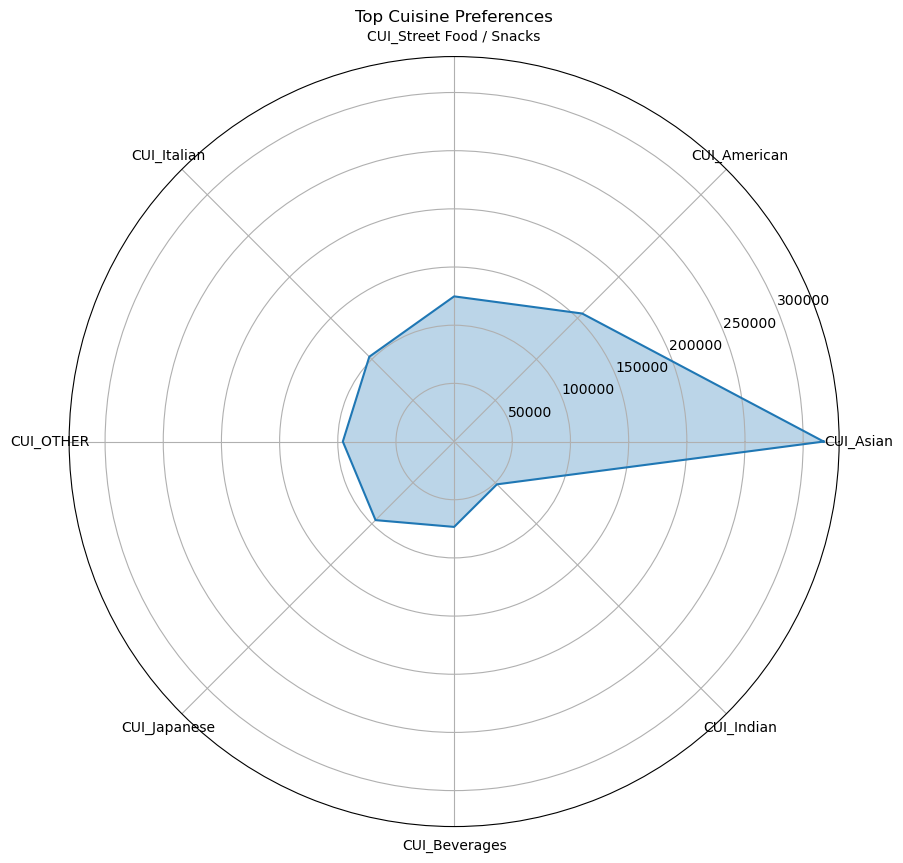

In [31]:
import matplotlib.pyplot as plt
from math import pi

# Prepare data
cuisine_totals = df[cuisine_cols].sum().sort_values(ascending=False)
top_cuisines = cuisine_totals.nlargest(8)

# Calculate angles for each cuisine
angles = [n / float(len(top_cuisines)) * 2 * pi for n in range(len(top_cuisines))]
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.plot(angles, list(top_cuisines.values) + [top_cuisines.values[0]])
ax.fill(angles, list(top_cuisines.values) + [top_cuisines.values[0]], alpha=0.3)

# Set labels
plt.xticks(angles[:-1], top_cuisines.index)
plt.title('Top Cuisine Preferences')
plt.show()

<Figure size 2000x1000 with 0 Axes>

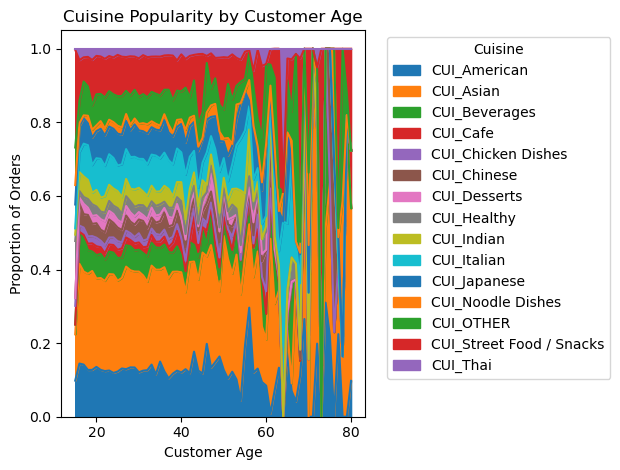

In [32]:
cuisine_age = df.groupby('customer_age')[cuisine_cols].sum()
cuisine_age_pct = cuisine_age.div(cuisine_age.sum(axis=1), axis=0)

plt.figure(figsize=(20, 10))
cuisine_age_pct.plot.area(stacked=True)
plt.title('Cuisine Popularity by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Proportion of Orders')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

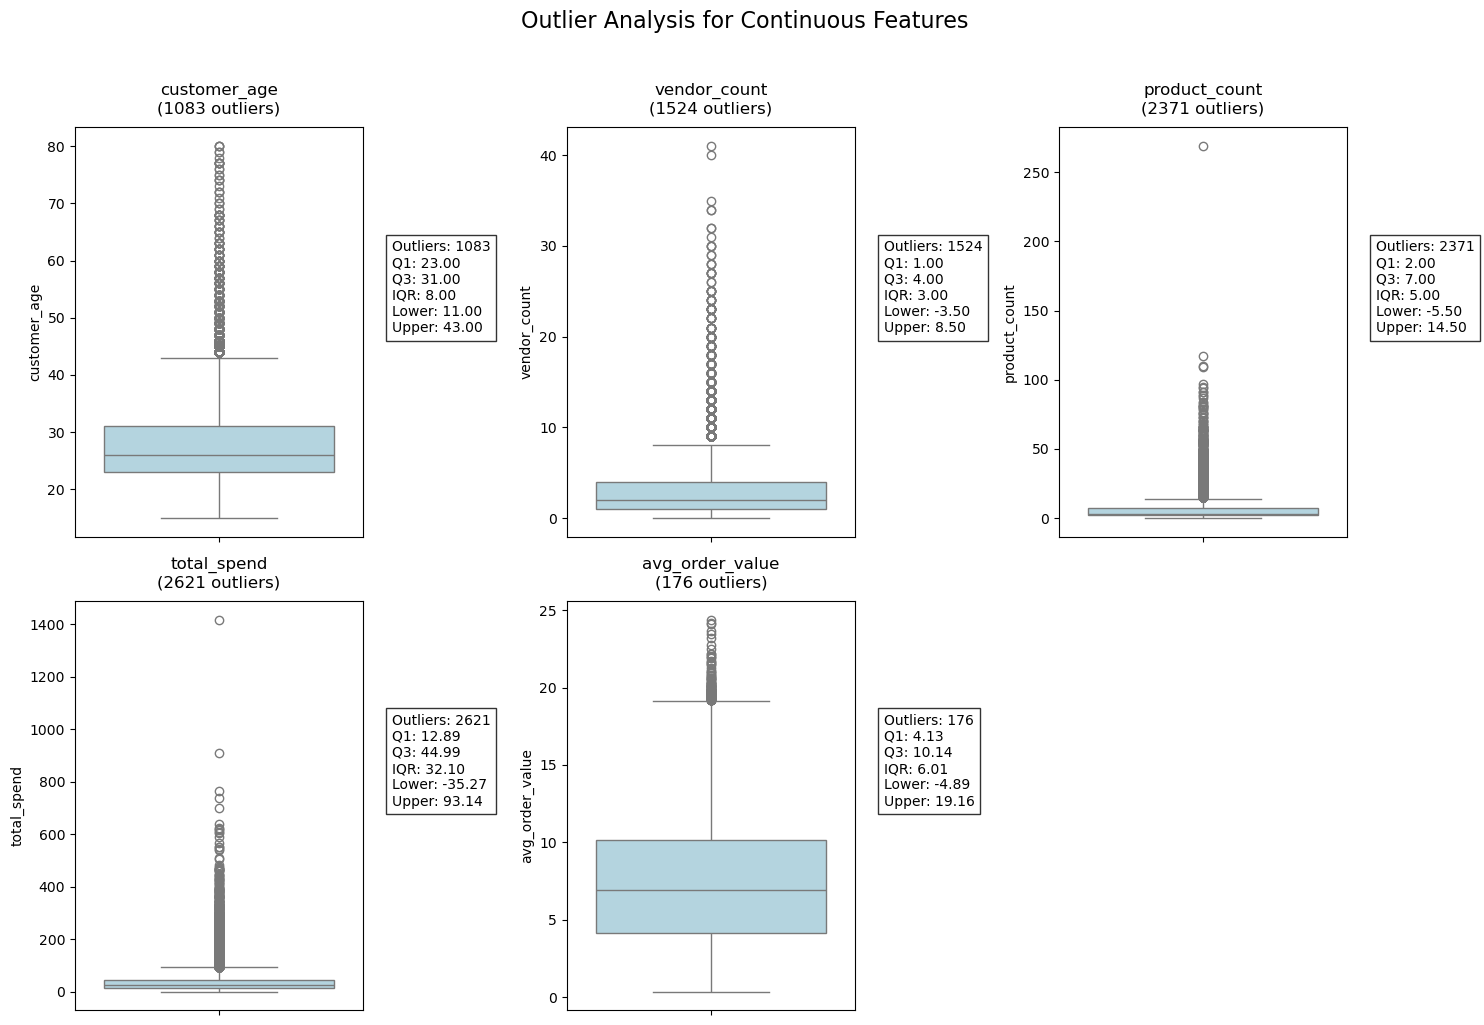

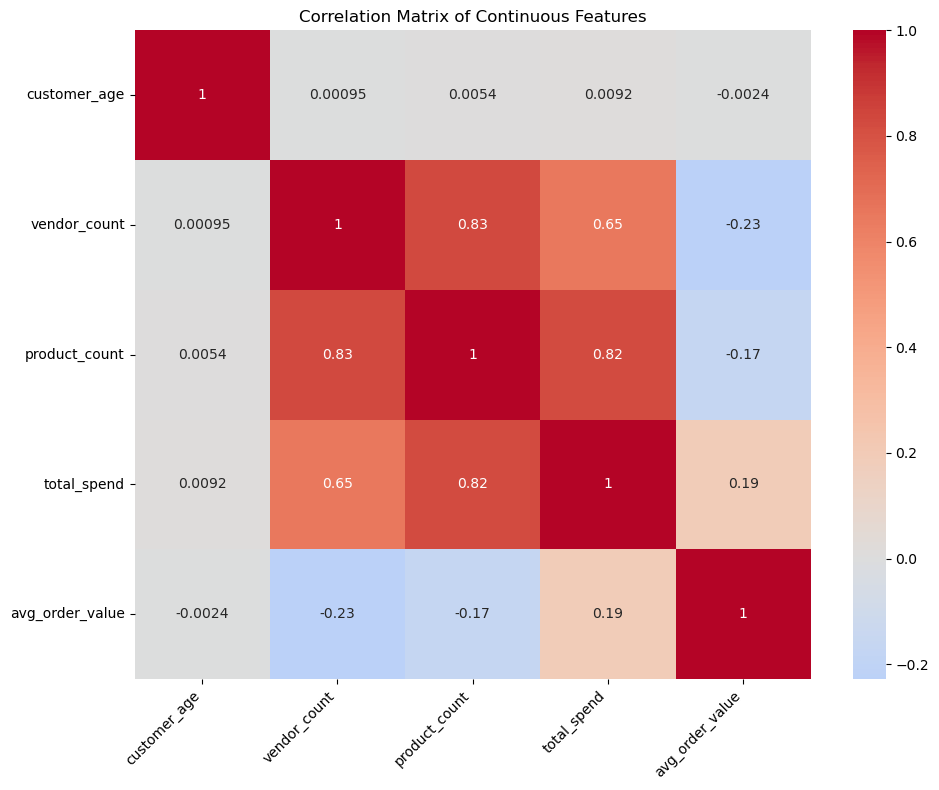


Outlier Analysis Report:
            Column  Total_Count  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound    Min      Max
0     customer_age        31888           1083                3.40        11.00        43.00  15.00    80.00
1     vendor_count        31888           1524                4.78        -3.50         8.50   0.00    41.00
2    product_count        31888           2371                7.44        -5.50        14.50   0.00   269.00
3      total_spend        31888           2621                8.22       -35.27        93.14   0.00  1418.33
4  avg_order_value        31888            176                0.55        -4.89        19.16   0.37      inf


In [33]:
def analyze_outliers(df):
    """
    Outlier analysis focusing on continuous variables with clean boxplots.
    """
    # Select only continuous numerical columns
    # Exclude discrete columns (like HR_, DOW_) and binary/categorical columns
    continuous_cols = ['customer_age', 'vendor_count', 'product_count', 
                      'total_spend', 'avg_order_value']
    
    # Filter for columns that exist in the dataframe
    continuous_cols = [col for col in continuous_cols if col in df.columns]
    
    # Create subplots for each continuous column
    n_cols = len(continuous_cols)
    n_rows = (n_cols + 2) // 3  # 3 plots per row
    
    fig = plt.figure(figsize=(15, 5*n_rows))
    fig.suptitle('Outlier Analysis for Continuous Features', fontsize=16, y=1.02)
    
    for idx, col in enumerate(continuous_cols, 1):
        # Create subplot
        plt.subplot(n_rows, 3, idx)
        
        # Create simple box plot
        sns.boxplot(y=df[col], color='lightblue')
        
        # Calculate outlier bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        plt.title(f'{col}\n({len(outliers)} outliers)', pad=10)
        
        # Add text with statistics
        stats_text = (f'Outliers: {len(outliers)}\n'
                     f'Q1: {Q1:.2f}\n'
                     f'Q3: {Q3:.2f}\n'
                     f'IQR: {IQR:.2f}\n'
                     f'Lower: {lower_bound:.2f}\n'
                     f'Upper: {upper_bound:.2f}')
        
        plt.text(1.1, 0.5, stats_text, transform=plt.gca().transAxes, 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Detailed outlier report
    outlier_report = pd.DataFrame(columns=['Column', 'Total_Count', 'Outlier_Count', 'Outlier_Percentage',
                                         'Lower_Bound', 'Upper_Bound', 'Min', 'Max'])
    
    for col in continuous_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_report.loc[len(outlier_report)] = [
            col,
            len(df[col]),
            len(outliers),
            (len(outliers) / len(df[col])) * 100,
            lower_bound,
            upper_bound,
            df[col].min(),
            df[col].max()
        ]
    
    # Correlation heatmap for continuous variables
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Continuous Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return outlier_report

# Add this to run the analysis:
outlier_report = analyze_outliers(df)
print("\nOutlier Analysis Report:")
print(outlier_report.round(2).to_string())

In [34]:

# from pandas_profiling import ProfileReport

# # Generate the profile report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# # Save the report as an HTML file
# profile.to_file("pandas_profiling_report.html")

# # Provide a link to the HTML file
# from IPython.display import display, HTML
# display(HTML('<a href="pandas_profiling_report.html" target="_blank">Open Pandas Profiling Report</a>'))




In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def create_split_visualization(df, save_path_1='combined_plots_part1.png', 
                             save_path_2='combined_plots_part2.png'):
    """
    Create two figures containing all visualizations, excluding customer_id.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    save_path_1 (str): Path to save the first part
    save_path_2 (str): Path to save the second part
    """
    # Create a copy without customer_id
    df_vis = df.drop('customer_id', axis=1)
    
    # Get all columns
    all_columns = df_vis.columns.tolist()
    
    # Split columns into two parts
    mid_point = len(all_columns) // 2
    columns_part1 = all_columns[:mid_point]
    columns_part2 = all_columns[mid_point:]
    
    # Function to create visualization for a set of columns
    def create_viz(columns, save_path):
        # Calculate grid dimensions
        total_cols = len(columns)
        n_cols = 4  # Number of columns in the grid
        n_rows = math.ceil(total_cols / n_cols)
        
        # Create figure
        fig = plt.figure(figsize=(20, 4 * n_rows))
        
        # Create subplots for each column
        for idx, col in enumerate(columns, 1):
            ax = plt.subplot(n_rows, n_cols, idx)
            
            if df_vis[col].dtype == 'object' or df_vis[col].dtype == 'category':
                # Create bar plot for categorical variables
                value_counts = df_vis[col].value_counts()
                sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
                
                # Rotate x-axis labels
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
                
                # Add count labels on top of bars
                for i, v in enumerate(value_counts.values):
                    ax.text(i, v, str(int(v)), ha='center', va='bottom')
                
            else:
                # Create histogram with KDE for numerical variables
                sns.histplot(data=df_vis, x=col, kde=True, ax=ax)
                
                # Add basic stats
                stats = f'μ={df_vis[col].mean():.1f}\nσ={df_vis[col].std():.1f}'
                ax.text(0.95, 0.95, stats,
                       transform=ax.transAxes,
                       verticalalignment='top',
                       horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Set title and adjust layout
            ax.set_title(col)
            ax.tick_params(axis='both', which='major', labelsize=8)
        
        # Adjust layout
        plt.tight_layout()
        
        # Save figure
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    
    # Create both visualizations
    create_viz(columns_part1, save_path_1)
    create_viz(columns_part2, save_path_2)

# Example usage:
create_split_visualization(df)

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_51837/1740446500.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_51837/1740446500.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_51837/1740446500.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/opt/anaconda3/envs/DM2024/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((